# High Order Finite Elements



* Finite elements implement the basis functions:
[myHOElement.hpp](/edit/myHOElement.hpp) 
[myHOElement.cpp](/edit/myHOElement.cpp)

* Finite element spaces implement the enumeration of degrees of freedom, and creation of elements:
[myHOFESpace.hpp](/edit/myHOFESpace.hpp) 
[myHOFESpace.cpp](/edit/myHOFESpace.cpp)



In [1]:
from ngsolve import *
from ngsolve.webgui import Draw
from myhofe import MyHighOrderFESpace

mesh = Mesh(unit_square.GenerateMesh(maxh=0.2, quad_dominated=False))

Loading myhofe library


We can now create an instance of our own finite element space:

In [2]:
fes = MyHighOrderFESpace(mesh, order=4, dirichlet="left|bottom|top")

and use it within NGSolve such as the builtin finite element spaces:

In [3]:
print ("ndof = ", fes.ndof)

ndof =  489


In [4]:
gfu = GridFunction(fes)
gfu.Set(x*x*y*y)

Draw (gfu)
Draw (grad(gfu)[0], mesh);

WebGuiWidget(layout=Layout(height='500px', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.2…

WebGuiWidget(layout=Layout(height='500px', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.2…

and solve the standard problem:

In [5]:
u,v = fes.TnT()
a = BilinearForm(grad(u)*grad(v)*dx).Assemble()
f = LinearForm(10*v*dx).Assemble()
gfu.vec.data = a.mat.Inverse(fes.FreeDofs())*f.vec
Draw (gfu, order=3);

WebGuiWidget(layout=Layout(height='500px', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.2…

In [6]:
errlist = []
for p in range(1,15):
    fes = MyHighOrderFESpace(mesh, order=p)
    func = sin(pi*x)*sin(pi*y)
    gfu = GridFunction(fes)
    gfu.Set(func)
    err = sqrt(Integrate( (func-gfu)**2, mesh, order=5+2*p))
    errlist.append((p,err))
print (errlist)

[(1, 0.018470559015394374), (2, 0.0016028677378609755), (3, 0.00011616801306622024), (4, 5.803815226253984e-06), (5, 4.056875365473615e-07), (6, 1.0483439025780243e-08), (7, 7.453639114498798e-10), (8, 1.205791598142954e-11), (9, 8.837711441740575e-13), (10, 3.1286760270120043e-13), (11, 6.568521269026107e-13), (12, 1.242147288218785e-12), (13, 2.15425311663937e-12), (14, 4.277532602978796e-12)]


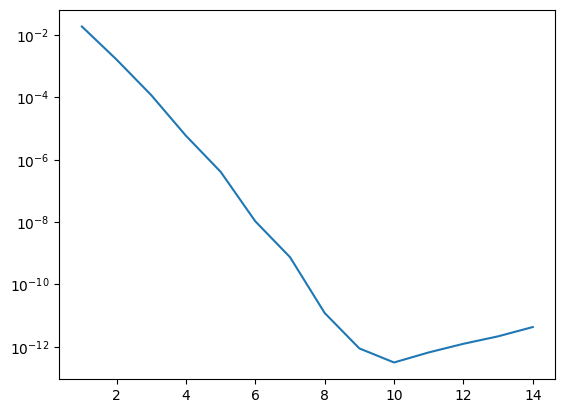

In [7]:
import matplotlib.pyplot as plt
n,err = zip(*errlist)
plt.yscale('log')
plt.plot(n,err);

**Exercises:**

Extend MyHighOrderFESpace by high order quadrilateral elements.

http://www.numa.uni-linz.ac.at/Teaching/PhD/Finished/zaglmayr-diss.pdf, 
page 68 ff